In [8]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
import pandas_datareader
import datetime

import pandas_datareader.data as web
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-1-f091f18400af>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
#creating a start and an end dates:
start = datetime.datetime(2016,1,1)
end = datetime.datetime.today()

In [3]:
#Microsoft
soft = web.DataReader("MSFT", "yahoo", start, end)
soft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,56.189999,55.419998,56.040001,55.480000,27334100.0,50.510929
2016-01-04,54.799999,53.389999,54.320000,54.799999,53778000.0,49.891834
2016-01-05,55.389999,54.540001,54.930000,55.049999,34079700.0,50.119446
2016-01-06,54.400002,53.639999,54.320000,54.049999,39518900.0,49.209011
2016-01-07,53.490002,52.070000,52.700001,52.169998,56564900.0,47.497398


Text(0.5, 1.0, 'Microsoft Cumulative Returns')

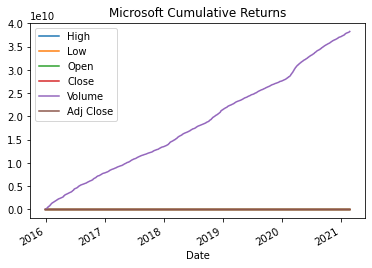

In [4]:
# Comulative Return
dr = soft.cumsum()
dr.plot()
plt.title('Microsoft Cumulative Returns')

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

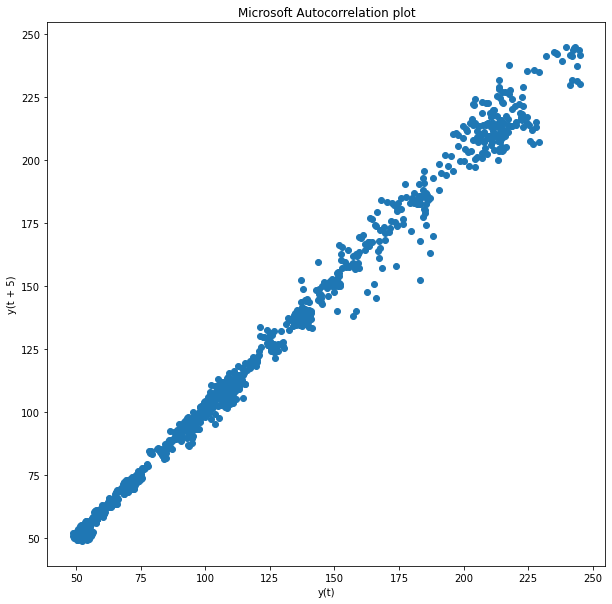

In [6]:
plt.figure(figsize=(10,10))
lag_plot(soft['Open'], lag=5)
plt.title('Microsoft Autocorrelation plot')

In [12]:
print(soft.head())
print(soft.shape)
print(soft.columns)

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2015-12-31  56.189999  55.419998  56.040001  55.480000  27334100.0  50.510929
2016-01-04  54.799999  53.389999  54.320000  54.799999  53778000.0  49.891834
2016-01-05  55.389999  54.540001  54.930000  55.049999  34079700.0  50.119446
2016-01-06  54.400002  53.639999  54.320000  54.049999  39518900.0  49.209011
2016-01-07  53.490002  52.070000  52.700001  52.169998  56564900.0  47.497398
(1298, 6)
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


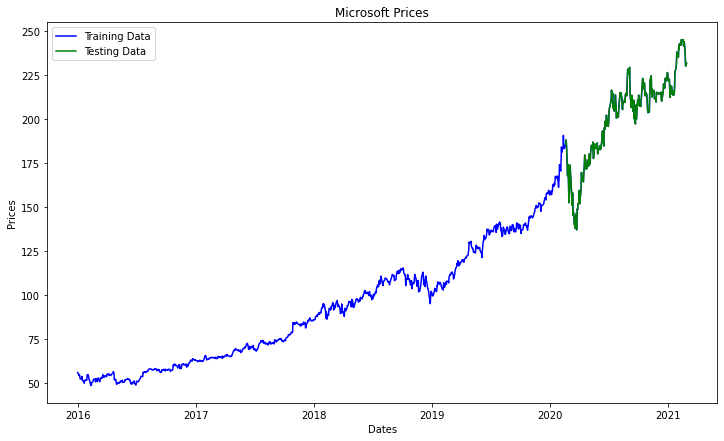

In [24]:
train_data, test_data = soft[0:int(len(soft)*0.8)], soft[int(len(soft)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(soft['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.legend()

In [25]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [26]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 18.600
Symmetric mean absolute percentage error: 13.887


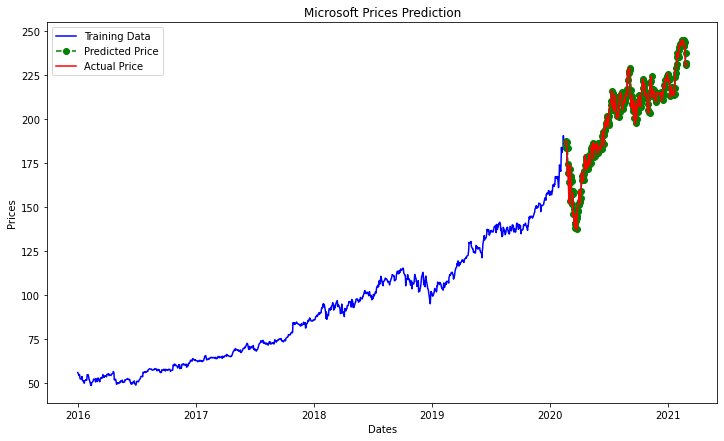

In [27]:
plt.figure(figsize=(12,7))
plt.plot(soft['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

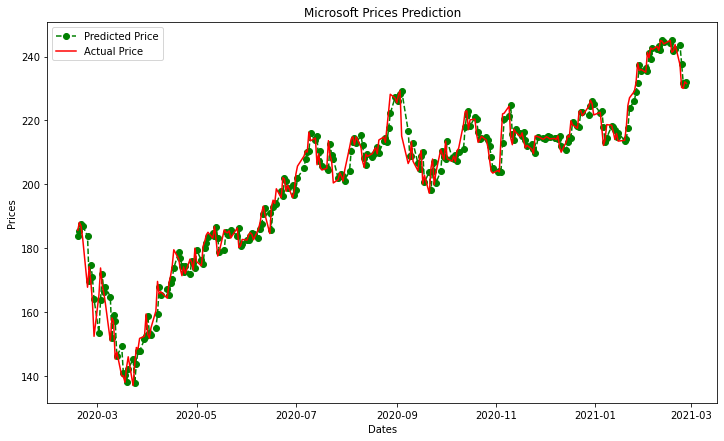

In [29]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [30]:
#Apple
apl = web.DataReader("AAPL", "yahoo", start, end)
apl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,26.757500,26.205000,26.752501,26.315001,163649200.0,24.343718
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208


Text(0.5, 1.0, 'Apple Cumulative Returns')

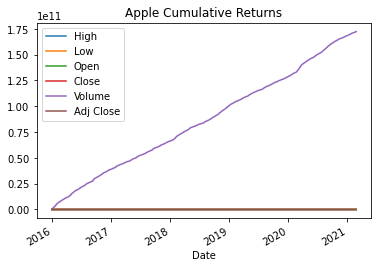

In [31]:
# Comulative Return
dr = apl.cumsum()
dr.plot()
plt.title('Apple Cumulative Returns')

Text(0.5, 1.0, 'Apple Autocorrelation plot')

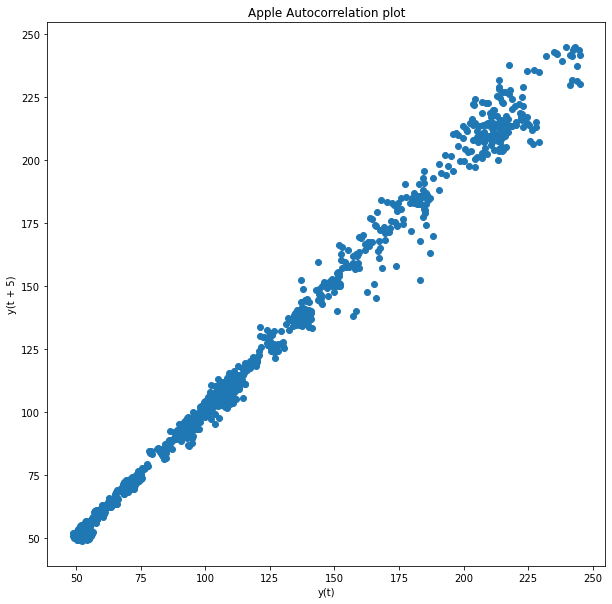

In [32]:
plt.figure(figsize=(10,10))
lag_plot(soft['Open'], lag=5)
plt.title('Apple Autocorrelation plot')

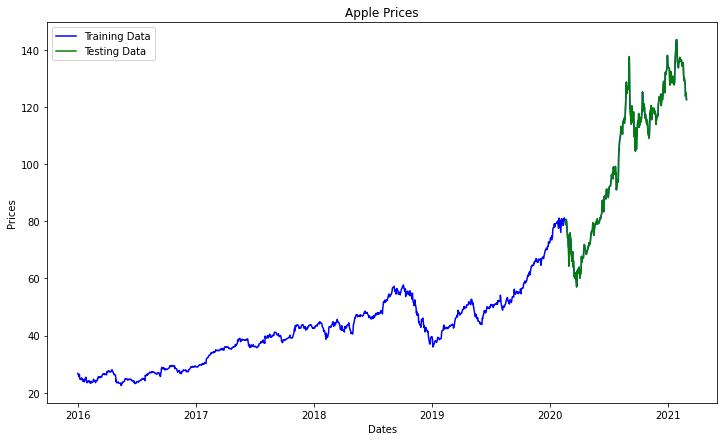

In [33]:
train_data, test_data = apl[0:int(len(soft)*0.8)], apl[int(len(soft)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(apl['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.legend()

In [34]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 8.277
Symmetric mean absolute percentage error: 27.969


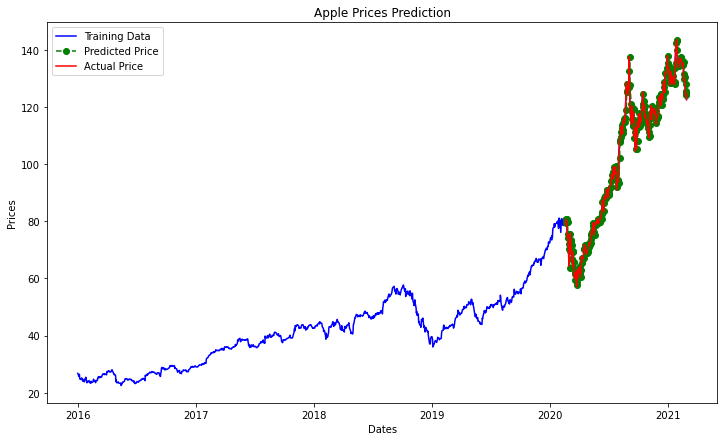

In [35]:
plt.figure(figsize=(12,7))
plt.plot(apl['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

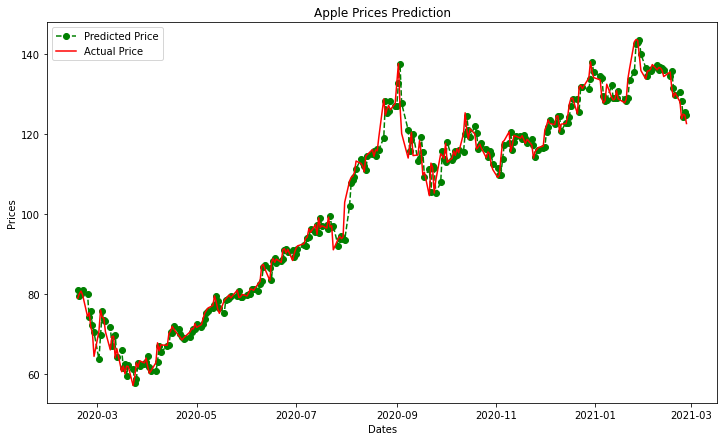

In [36]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [37]:
#Google
gog = web.DataReader('GOOG', 'yahoo', start, end)
gog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,769.500000,758.340027,769.500000,758.880005,1500900,758.880005
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015


Text(0.5, 1.0, 'Google Cumulative Returns')

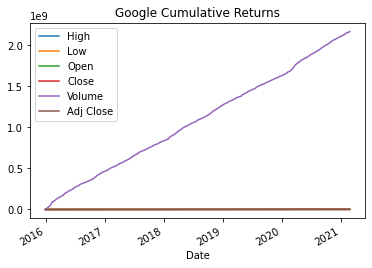

In [38]:
# Comulative Return
dr = gog.cumsum()
dr.plot()
plt.title('Google Cumulative Returns')

Text(0.5, 1.0, 'Google Autocorrelation plot')

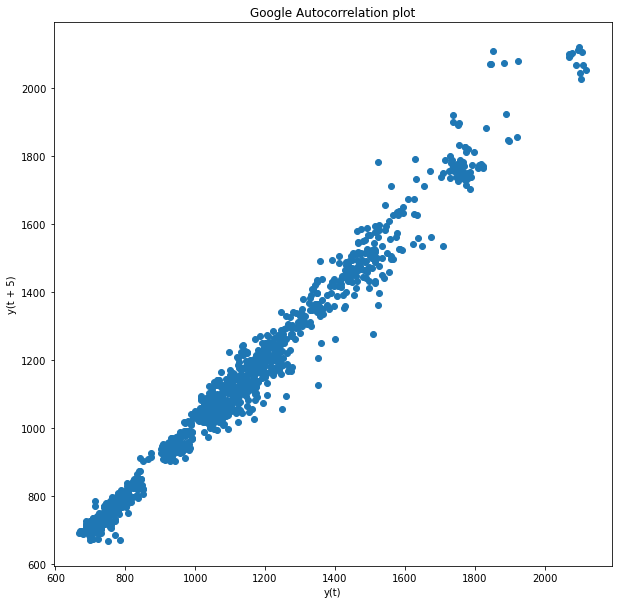

In [39]:
plt.figure(figsize=(10,10))
lag_plot(gog['Open'], lag=5)
plt.title('Google Autocorrelation plot')

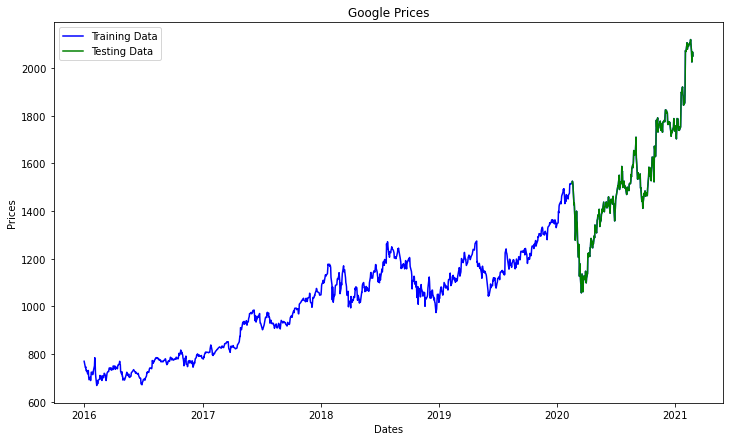

In [40]:
train_data, test_data = gog[0:int(len(gog)*0.8)], gog[int(len(gog)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Google Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(gog['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.legend()

In [41]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 1227.486
Symmetric mean absolute percentage error: 17.272


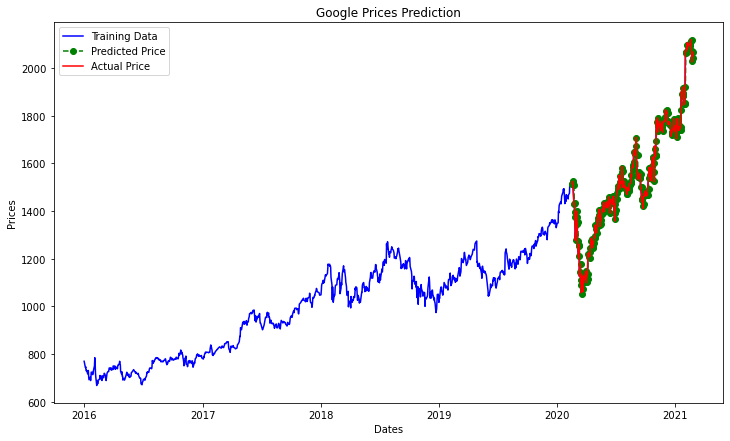

In [42]:
plt.figure(figsize=(12,7))
plt.plot(gog['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Google Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

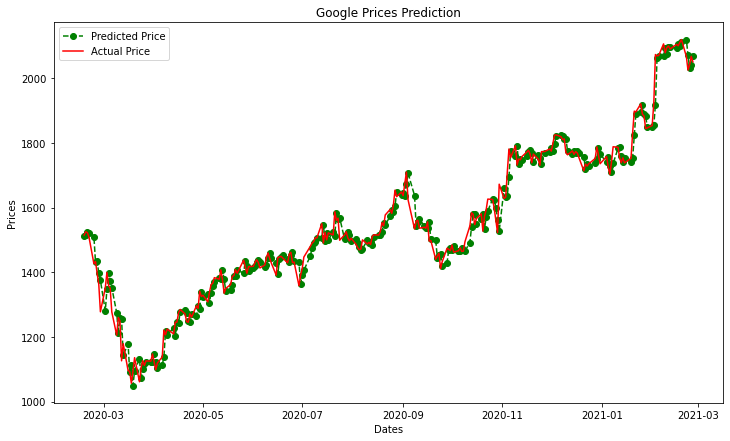

In [43]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Google Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()